In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples,silhouette_score
import plotly.graph_objects as go
from warnings import filterwarnings as fw
fw("ignore")

ImportError: DLL load failed while importing _path: The specified module could not be found.

In [2]:
!pip freeze

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functoo

In [3]:
!pip install seaborn

ImportError: DLL load failed while importing _path: The specified module could not be found.

In [2]:
df = pd.read_csv("trans_sales_ (1).csv")
df.head()

,customer,product,2004_qty_month1,2004_qty_month2,2004_qty_month3,2004_qty_month4,2004_qty_month5,2004_qty_month6,2004_qty_month7,2004_qty_month8,2004_qty_month9,2004_qty_month10,2004_qty_month11,2004_qty_month12,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,2004_Total_qty
0,T133820637,PRD1,0,0,0,0,30,0,0,0,0,30,0,0,0,30,0,30,60
1,T147810859,PRD2,0,10,0,0,0,0,0,0,0,0,0,0,10,0,0,0,10
2,T172860382,PRD2,0,0,10,0,0,30,0,0,0,0,0,0,10,30,0,0,40
3,41206,PRD2,126,63,123,66,33,0,113,60,175,0,0,0,312,99,348,0,759
4,41206,PRD3,0,0,110,20,7,90,0,30,179,90,30,150,110,117,209,270,706


In [3]:
month_list = "customer,product".split(",")
month_list

['customer', 'product']

In [4]:
month_df_cols = ['customer','product']
quarter_df_cols = ['customer','product']
df[month_list[0]] = df[month_list[0]].astype("str")
df[month_list[1]] = df[month_list[1]].astype("str")

In [5]:
for cols in df.columns:
    if 'month' in cols and cols not in month_df_cols:
        month_df_cols.append(cols)
        # print(month_list)
    if 'quarter' in cols and cols not in quarter_df_cols:
        quarter_df_cols.append(cols)

In [6]:
quarter_df_cols

['customer',
 'product',
 '2004_qty_quarter1',
 '2004_qty_quarter2',
 '2004_qty_quarter3',
 '2004_qty_quarter4']

In [7]:
quarter_df = df[quarter_df_cols]
month_df = df[month_df_cols]

In [8]:
products = "PRD1,PRD2,PRD3".split(",")
ind = 0

In [9]:
quarter_df = quarter_df[quarter_df['product']==products[ind]]

In [10]:
month_df = month_df[month_df['product']==products[ind]]

In [152]:
quarter_x = quarter_df.iloc[:,2:]
month_x = month_df.iloc[:,2:]

In [12]:
display(quarter_x.head(),month_x.head())

,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4
0,0,30,0,30
5,900,630,859,499
7,0,0,0,30
10,140,0,0,0
13,1650,2800,2020,1459


,2004_qty_month1,2004_qty_month2,2004_qty_month3,2004_qty_month4,2004_qty_month5,2004_qty_month6,2004_qty_month7,2004_qty_month8,2004_qty_month9,2004_qty_month10,2004_qty_month11,2004_qty_month12
0,0,0,0,0,30,0,0,0,0,30,0,0
5,450,90,360,378,192,60,389,390,80,200,209,90
7,0,0,0,0,0,0,0,0,0,0,30,0
10,0,0,140,0,0,0,0,0,0,0,0,0
13,330,700,620,1070,880,850,610,680,730,730,549,180


In [13]:
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
display(month_df.head(10))

,customer,product,2004_qty_month1,2004_qty_month2,2004_qty_month3,2004_qty_month4,2004_qty_month5,2004_qty_month6,2004_qty_month7,2004_qty_month8,2004_qty_month9,2004_qty_month10,2004_qty_month11,2004_qty_month12
0,T133820637,PRD1,0,0,0,0,30,0,0,0,0,30,0,0
5,41206,PRD1,450,90,360,378,192,60,389,390,80,200,209,90
7,30183075,PRD1,0,0,0,0,0,0,0,0,0,0,30,0
10,50678040,PRD1,0,0,140,0,0,0,0,0,0,0,0,0
13,51483171,PRD1,330,700,620,1070,880,850,610,680,730,730,549,180
14,100277061,PRD1,160,340,320,30,100,200,90,0,100,0,0,0
16,110482032,PRD1,0,0,0,0,0,0,0,0,0,0,0,0
19,230170109,PRD1,0,0,0,0,0,0,0,0,0,90,0,0
20,300664045,PRD1,0,0,0,0,0,0,0,0,0,0,0,0
21,360157013,PRD1,0,0,0,60,30,0,0,0,0,0,0,0


### Implementing KMEANS Algorithm

In [14]:
def finding_cls_no(K,data):
    cluster_values = list(range(1,K+1))
    inertias = []
    
    for c in cluster_values:
        model = KMeans(n_clusters=c,init="k-means++",max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)
    return inertias

In [15]:
def elbow_curve(time_n,dfs):
    op = finding_cls_no(12,dfs)
    distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": op})
#     display(distances)
    
    figure = go.Figure()
    figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

    figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),
                      xaxis_title="Number of clusters",
                      yaxis_title="Sum of squared distances",
                      title_text=f"Finding optimal number of clusters using elbow method in {time_n} level data for the product {products[ind]}")
#     figure.show()
    
    kmeans_model_new = KMeans(n_clusters = 3,init='k-means++',max_iter=400,random_state=42)
    cluster = kmeans_model_new.fit_predict(dfs)
    return cluster

for dfs in [month_x,quarter_x]:
    if "month" in list(dfs.columns)[0]:
        month_df['cluster'] = elbow_curve("Month",dfs)
        display(month_df[month_df['cluster']==0].head(15))
        display(month_df[month_df['cluster']==1].head(15))
        display(month_df[month_df['cluster']==2].head(15))
        display(month_df[month_df['cluster']==3].head(15))
    else:
        quarter_df['cluster'] = elbow_curve("Quarter",dfs)
        
        display(quarter_df[quarter_df['cluster']==0].head(15))
        display(quarter_df[quarter_df['cluster']==1].head(15))
        display(quarter_df[quarter_df['cluster']==2].head(15))
        display(quarter_df[quarter_df['cluster']==3].head(15))


,customer,product,2004_qty_month1,2004_qty_month2,2004_qty_month3,2004_qty_month4,2004_qty_month5,2004_qty_month6,2004_qty_month7,2004_qty_month8,2004_qty_month9,2004_qty_month10,2004_qty_month11,2004_qty_month12,cluster
0,T133820637,PRD1,0,0,0,0,30,0,0,0,0,30,0,0,0
5,41206,PRD1,450,90,360,378,192,60,389,390,80,200,209,90,0
7,30183075,PRD1,0,0,0,0,0,0,0,0,0,0,30,0,0
10,50678040,PRD1,0,0,140,0,0,0,0,0,0,0,0,0,0
14,100277061,PRD1,160,340,320,30,100,200,90,0,100,0,0,0,0
16,110482032,PRD1,0,0,0,0,0,0,0,0,0,0,0,0,0
19,230170109,PRD1,0,0,0,0,0,0,0,0,0,90,0,0,0
20,300664045,PRD1,0,0,0,0,0,0,0,0,0,0,0,0,0
21,360157013,PRD1,0,0,0,60,30,0,0,0,0,0,0,0,0
24,384164072,PRD1,90,0,150,60,60,0,60,0,0,240,210,210,0


,customer,product,2004_qty_month1,2004_qty_month2,2004_qty_month3,2004_qty_month4,2004_qty_month5,2004_qty_month6,2004_qty_month7,2004_qty_month8,2004_qty_month9,2004_qty_month10,2004_qty_month11,2004_qty_month12,cluster
583,39309,PRD1,2053,1387,2220,2190,2354,1710,2435,2232,1950,1986,1920,1226,1
608,40497,PRD1,1240,1630,2275,1200,1910,1355,1390,1664,2156,1282,1336,1448,1
633,41833,PRD1,2903,2756,2839,2312,2121,2791,1938,1408,1578,1498,2010,1460,1
698,45843,PRD1,2381,2378,2646,2364,2529,2100,1991,2134,1842,2808,2114,2416,1
709,46970,PRD1,1770,690,1320,1750,740,2310,660,820,720,810,2050,870,1
862,50280082,PRD1,1144,1290,900,1530,1094,1920,1260,1300,960,1230,1620,960,1
936,51270064,PRD1,780,810,2208,750,750,2676,780,1110,1680,1080,1050,870,1
958,51284085,PRD1,5300,4470,4310,4130,3920,2460,2490,4060,2930,4150,4630,2730,1
1125,100173048,PRD1,1170,1580,1090,1230,1270,1340,1230,1430,1530,1208,1000,1290,1
1225,100372029,PRD1,870,1050,1650,1140,1202,1020,1390,1245,1710,1630,1460,1949,1


,customer,product,2004_qty_month1,2004_qty_month2,2004_qty_month3,2004_qty_month4,2004_qty_month5,2004_qty_month6,2004_qty_month7,2004_qty_month8,2004_qty_month9,2004_qty_month10,2004_qty_month11,2004_qty_month12,cluster
13,51483171,PRD1,330,700,620,1070,880,850,610,680,730,730,549,180,2
442,28712,PRD1,780,870,510,510,600,960,254,620,280,340,760,310,2
447,29260,PRD1,900,887,1304,644,1338,1270,854,1254,1080,540,1350,870,2
450,29370,PRD1,721,360,435,487,540,491,377,572,665,970,337,180,2
457,30069,PRD1,960,1138,1020,1600,718,630,630,700,720,710,688,478,2
461,32143,PRD1,850,582,590,700,520,1040,368,1178,151,890,469,390,2
464,32254,PRD1,240,450,310,300,300,150,240,450,340,515,442,240,2
481,33441,PRD1,312,420,240,570,360,720,840,480,1082,938,788,1148,2
490,33763,PRD1,270,460,359,510,340,570,284,450,270,330,180,300,2
514,35612,PRD1,540,600,690,360,420,540,900,630,750,600,300,360,2


,customer,product,2004_qty_month1,2004_qty_month2,2004_qty_month3,2004_qty_month4,2004_qty_month5,2004_qty_month6,2004_qty_month7,2004_qty_month8,2004_qty_month9,2004_qty_month10,2004_qty_month11,2004_qty_month12,cluster


,customer,product,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster
0,T133820637,PRD1,0,30,0,30,0
5,41206,PRD1,900,630,859,499,0
7,30183075,PRD1,0,0,0,30,0
10,50678040,PRD1,140,0,0,0,0
14,100277061,PRD1,820,330,190,0,0
16,110482032,PRD1,0,0,0,0,0
19,230170109,PRD1,0,0,0,90,0
20,300664045,PRD1,0,0,0,0,0
21,360157013,PRD1,0,90,0,0,0
24,384164072,PRD1,240,120,60,660,0


,customer,product,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster
583,39309,PRD1,5660,6254,6617,5132,1
608,40497,PRD1,5145,4465,5210,4066,1
633,41833,PRD1,8498,7224,4924,4968,1
698,45843,PRD1,7405,6993,5967,7338,1
709,46970,PRD1,3780,4800,2200,3730,1
862,50280082,PRD1,3334,4544,3520,3810,1
936,51270064,PRD1,3798,4176,3570,3000,1
958,51284085,PRD1,14080,10510,9480,11510,1
1125,100173048,PRD1,3840,3840,4190,3498,1
1225,100372029,PRD1,3570,3362,4345,5039,1


,customer,product,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster
13,51483171,PRD1,1650,2800,2020,1459,2
442,28712,PRD1,2160,2070,1154,1410,2
447,29260,PRD1,3091,3252,3188,2760,2
450,29370,PRD1,1516,1518,1614,1487,2
457,30069,PRD1,3118,2948,2050,1876,2
461,32143,PRD1,2022,2260,1697,1749,2
464,32254,PRD1,1000,750,1030,1197,2
481,33441,PRD1,972,1650,2402,2874,2
490,33763,PRD1,1089,1420,1004,810,2
514,35612,PRD1,1830,1320,2280,1260,2


,customer,product,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster


In [398]:
display(quarter_df[quarter_df['customer']=='T133820637'])

,customer,product,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster
0,T133820637,PRD1,0,30,0,30,0


In [481]:
series = quarter_x.drop("cluster",axis=1)

In [482]:
series.insert(4,"customer",value=quarter_df['customer'])

In [483]:
# series = series.set_index("customer")

In [484]:
series = series.reset_index(drop=True)
series = series.T
for i in range(len(series.columns)):
    series.rename(columns={series.columns[i]:series.iloc[4][i]},inplace=True)
series.drop(["customer"],axis = 0, inplace=True)


In [485]:
series.index.name = "quarter"
series

,T133820637,41206,30183075,50678040,51483171,100277061,110482032,230170109,300664045,360157013,...,210165120,210167107,210168091,210169087,210170078,210172062,210173033,210173152,210174117,210176046
quarter,,,,,,,,,,,,,,,,,,,,,
2004_qty_quarter1,0,900,0,140,1650,820,0,0,0,0,...,6128,30,400,0,150,0,300,0,20,1066
2004_qty_quarter2,30,630,0,0,2800,330,0,0,0,90,...,4656,0,344,0,150,0,390,0,0,1443
2004_qty_quarter3,0,859,0,0,2020,190,0,0,0,0,...,3202,0,180,10,180,0,330,0,0,1117
2004_qty_quarter4,30,499,30,0,1459,0,0,90,0,0,...,1840,0,300,0,210,0,30,0,0,1600


(4, 800)

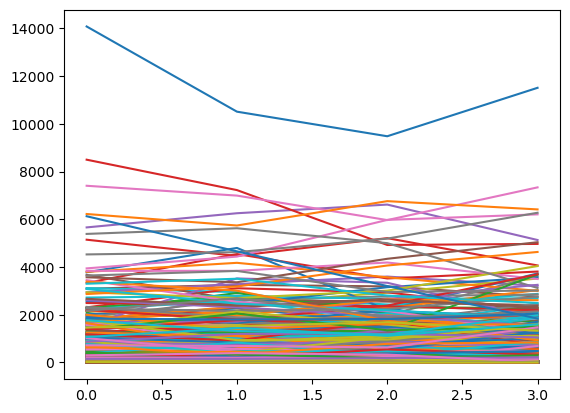

In [487]:
data = series.head().to_numpy()


display(data.shape)

plt.plot(data)
plt.show()

In [450]:
# !pip install dtaidistance

In [454]:
# !pip install tslearn

In [473]:
from tslearn.clustering import TimeSeriesKMeans as tsk

In [474]:
model = tsk(n_clusters=3,metric="dtw",max_iter=10,random_state=42)

In [475]:
data = model.fit_predict(quarter_x)

quarter_x['cluster']=data

In [476]:
display(quarter_x[quarter_x['cluster']==0].head(10))
display(quarter_x[quarter_x['cluster']==1].head(10))
display(quarter_x[quarter_x['cluster']==2].head(10))
quarter_x[quarter_x['cluster']==3].head(10)

,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster
0,0,30,0,30,0
5,900,630,859,499,0
7,0,0,0,30,0
10,140,0,0,0,0
14,820,330,190,0,0
16,0,0,0,0,0
19,0,0,0,90,0
20,0,0,0,0,0
21,0,90,0,0,0
24,240,120,60,660,0


,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster
13,1650,2800,2020,1459,1
442,2160,2070,1154,1410,1
447,3091,3252,3188,2760,1
450,1516,1518,1614,1487,1
457,3118,2948,2050,1876,1
461,2022,2260,1697,1749,1
481,972,1650,2402,2874,1
514,1830,1320,2280,1260,1
526,2940,3285,3600,3210,1
569,2294,2761,2430,2109,1


,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster
583,5660,6254,6617,5132,2
608,5145,4465,5210,4066,2
633,8498,7224,4924,4968,2
698,7405,6993,5967,7338,2
958,14080,10510,9480,11510,2
1254,3943,4437,5975,6207,2
1312,5387,5625,5000,3123,2
1377,6222,5740,6761,6414,2
1566,4528,4623,5190,6274,2
1977,6128,4656,3202,1840,2


,2004_qty_quarter1,2004_qty_quarter2,2004_qty_quarter3,2004_qty_quarter4,cluster


In [500]:
# !pip uninstall trend_classifier

In [491]:
# !pip install yfinance
import datetime as dt
from dateutil.relativedelta import relativedelta
import yfinance as yf
end = dt.date.today()
start = dt.date.today() - relativedelta(months=1)
data = yf.download("SUZLON.NS",start,end)
data.reset_index()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-08,18.650000,18.950001,18.350000,18.600000,18.600000,107177129
1,2023-08-09,18.950001,19.500000,18.900000,19.500000,19.500000,204669757
2,2023-08-10,19.950001,20.450001,19.900000,20.450001,20.450001,198521194
3,2023-08-11,20.750000,21.250000,19.799999,20.200001,20.200001,193133275
4,2023-08-14,19.549999,20.200001,19.299999,20.049999,20.049999,110526997
5,2023-08-16,20.049999,20.500000,20.049999,20.250000,20.250000,66006572
6,2023-08-17,19.850000,20.000000,19.400000,19.700001,19.700001,130822363
7,2023-08-18,19.799999,20.049999,19.500000,19.799999,19.799999,70016385
8,2023-08-21,20.100000,20.150000,19.799999,19.900000,19.900000,71793107
9,2023-08-22,19.950001,20.850000,19.950001,20.850000,20.850000,189624524
